
# Liver Disease Prediction

#### Content
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Columns:

- Age of the patient
- Gender of the patient
- Total Bilirubin
- Direct Bilirubin
- Alkaline Phosphotase
- Alamine Aminotransferase
- Aspartate Aminotransferase
- Total Protiens
- Albumin
- Albumin and Globulin Ratio
- Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# for displaying all feature from dataset:
pd.pandas.set_option('display.max_columns', None)

In [3]:
# Reading Dataset:
df = pd.read_csv("/content/Liver_data.csv")
# Top 5 records:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
# Last 5 records:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [5]:
# Shape of dataset:
df.shape

(583, 11)

In [6]:
# Cheaking Missing (NaN) Values:
df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


- 'Albumin_and_Globulin_Ratio' feature contain 4 NaN values.

In [7]:
# Mean & Median of "Albumin_and_Globulin_Ratio" feature:
print(df['Albumin_and_Globulin_Ratio'].median())
print(df['Albumin_and_Globulin_Ratio'].mean())

0.93
0.9470639032815197


In [8]:
# Filling NaN Values of "Albumin_and_Globulin_Ratio" feature with Median :
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median())

In [9]:
# Datatypes:
df.dtypes

,0
Age,int64
Gender,object
Total_Bilirubin,float64
Direct_Bilirubin,float64
Alkaline_Phosphotase,int64
Alamine_Aminotransferase,int64
Aspartate_Aminotransferase,int64
Total_Protiens,float64
Albumin,float64
Albumin_and_Globulin_Ratio,float64


In [10]:
df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,0


In [11]:
# Description:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.946947,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318495,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Liver Disease Patients      : 416
Non Liver Disease Patients  : 167


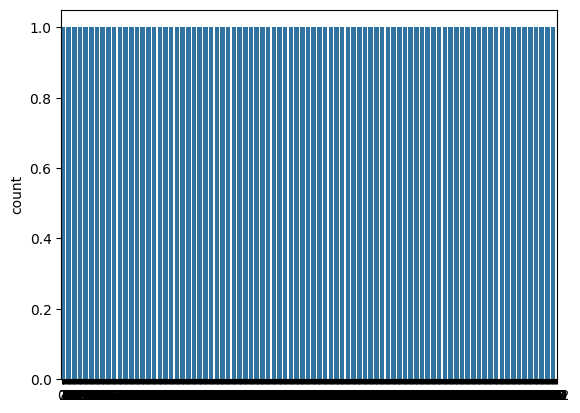

In [12]:
# Target feature:
print("Liver Disease Patients      :", df['Dataset'].value_counts()[1])
print("Non Liver Disease Patients  :", df['Dataset'].value_counts()[2])

# Visualization:
sns.countplot(df['Dataset'])
plt.show()

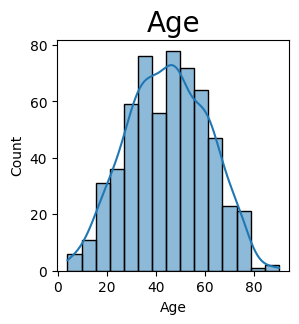

In [13]:
# Histrogram of Age univariate:
plt.figure(figsize=(3, 3))
sns.histplot(df['Age'], kde=True)
plt.title('Age', fontsize=20)
plt.show()

<ipython-input-14-b327c2cb1129>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Albumin'])


<Axes: xlabel='Albumin', ylabel='Density'>

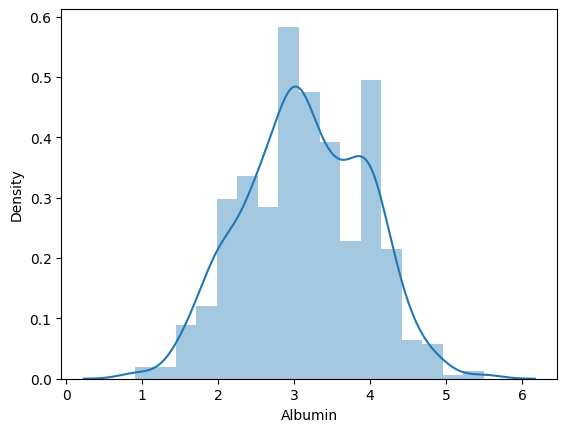

In [14]:
#univariate
sns.distplot(df['Albumin'])

In [15]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<ipython-input-16-7c60653b326e>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Total Male   :", df['Gender'].value_counts()[0])
<ipython-input-16-7c60653b326e>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Total Female :", df['Gender'].value_counts()[1])


Total Male   : 441
Total Female : 142


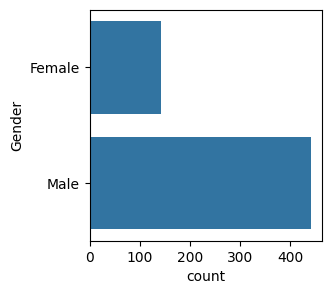

In [16]:
# Gender feature bivariate:
plt.figure(figsize=(3, 3))
print("Total Male   :", df['Gender'].value_counts()[0])
print("Total Female :", df['Gender'].value_counts()[1])

# Visualization:
sns.countplot(df['Gender'])
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


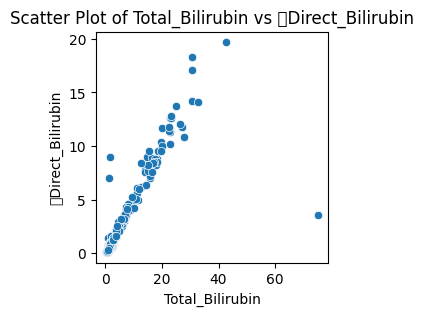

In [17]:
#Bivariate Analysis
plt.figure(figsize=(3, 3))
sns.scatterplot(x='Total_Bilirubin', y='Direct_Bilirubin', data=df)
plt.title('Scatter Plot of Total_Bilirubin vs 	Direct_Bilirubin')
plt.xlabel('Total_Bilirubin')
plt.ylabel('	Direct_Bilirubin')
plt.show()

In [18]:
# Printing How many Unique values present in each feature:
for feature in df.columns:
    print(feature,":", len(df[feature].unique()))

Age : 72
Gender : 2
Total_Bilirubin : 113
Direct_Bilirubin : 80
Alkaline_Phosphotase : 263
Alamine_Aminotransferase : 152
Aspartate_Aminotransferase : 177
Total_Protiens : 58
Albumin : 40
Albumin_and_Globulin_Ratio : 69
Dataset : 2


In [19]:
# Label Encoding
df['Gender'] = np.where(df['Gender']=='Male', 1,0)

In [20]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


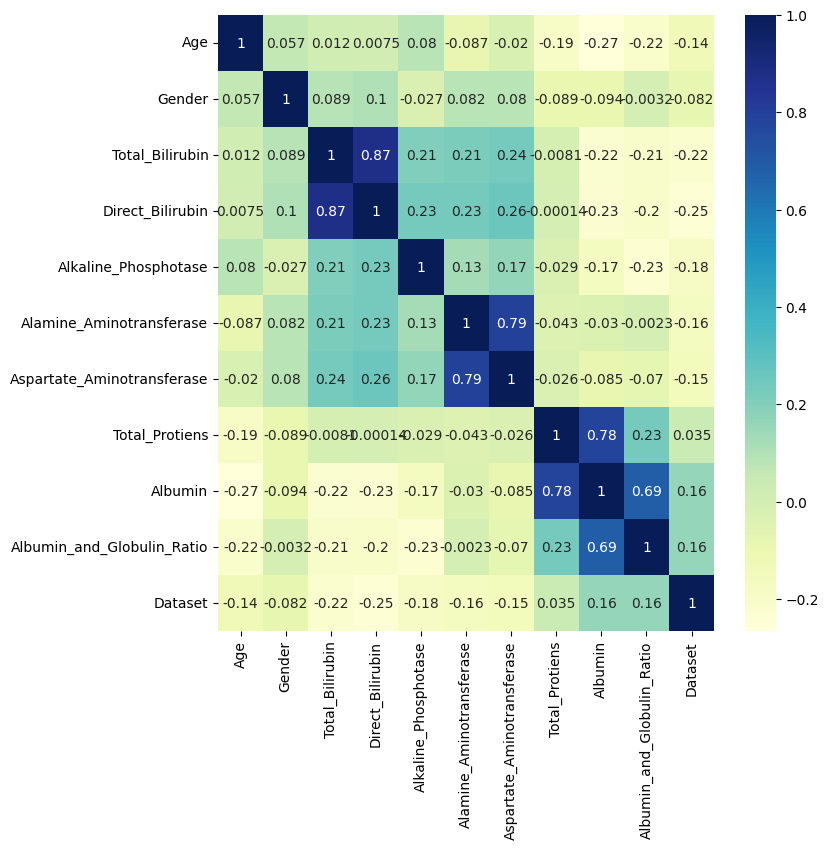

In [21]:
# Correlation using Heatmap multivariate:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

<Figure size 1000x800 with 0 Axes>

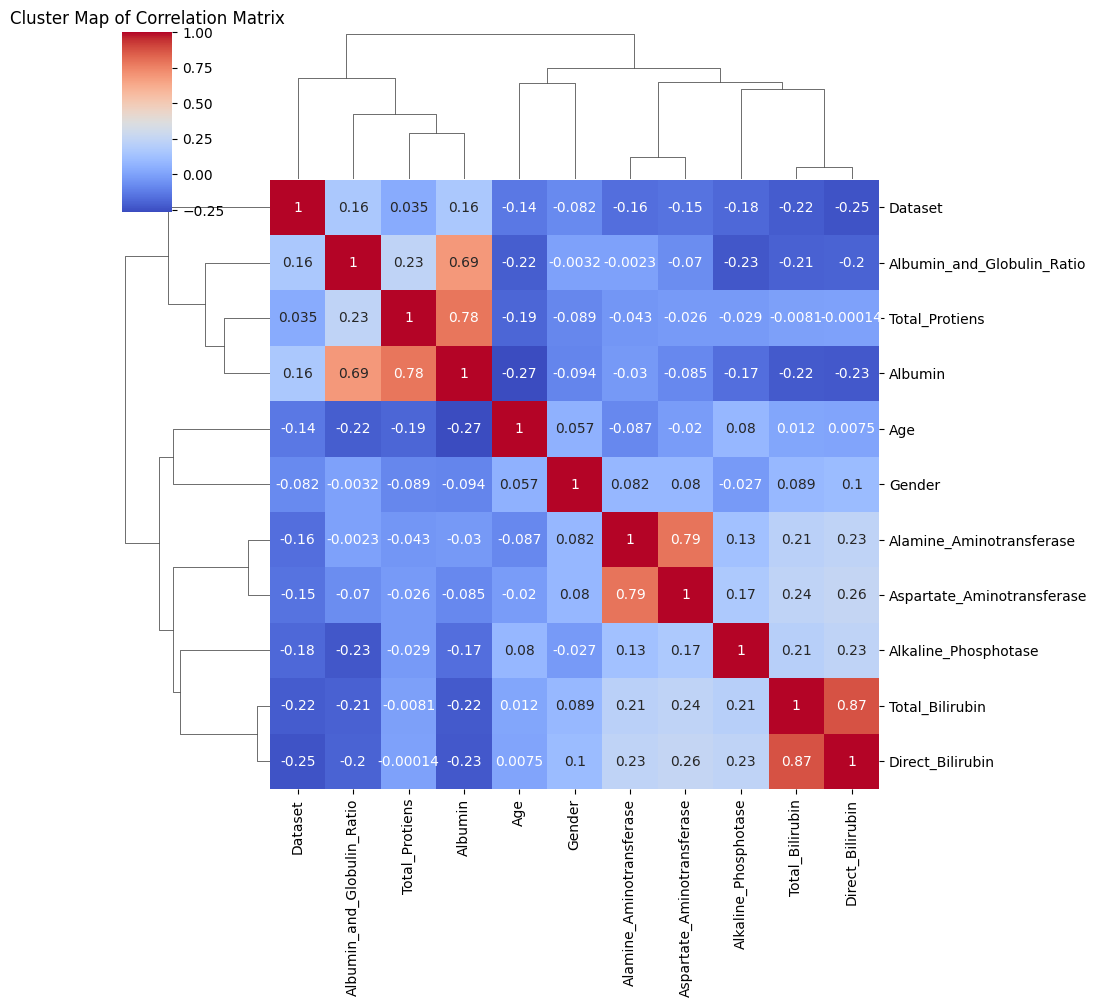

In [22]:
plt.figure(figsize=(10, 8))
sns.clustermap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Cluster Map of Correlation Matrix')
plt.show()

#### There is Multi-Collinearity found on our dataset.

In [23]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

1. Multicollinearity betwwen **'Total_Bilirubin'** and **'Direct_Bilirubin'** is **0.87%**
2. Multicollinearity betwwen **'Alamine_Aminotransferase'** and **'Aspartate_Aminotransferase' **is **0.79%**
3. Multicollinearity betwwen **'Total_Protiens'** and **'Albumin'** is **0.78%**
4. Multicollinearity betwwen **'Albumin'** and **'Albumin_and_Globulin_Ratio'** is **0.69%**

Usually we drop that feature which has above 0.85% multicollinearity between two independent feature.
Here we have only 'Total_Bilirubin' and 'Direct_Bilirubin' feature which has 0.87% mutlicollinearity. So we drop one of the feature from them
and other independent feature has less multicollinearity, less than 0.80% So we keep that feature.

In [24]:
# Droping 'Direct_Bilirubin' feature:
df = df.drop('Direct_Bilirubin', axis=1)

In [25]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [26]:
# Calculate the boundaries of Total_Protiens feature which differentiates the outliers:
uppper_boundary=df['Total_Protiens'].mean() + 3* df['Total_Protiens'].std()
lower_boundary=df['Total_Protiens'].mean() - 3* df['Total_Protiens'].std()

print(df['Total_Protiens'].mean())
print(lower_boundary)
print(uppper_boundary)

6.483190394511149
3.22683594244075
9.739544846581548


In [27]:
##### Calculate the boundaries of Albumin feature which differentiates the outliers:
uppper_boundary=df['Albumin'].mean() + 3* df['Albumin'].std()
lower_boundary=df['Albumin'].mean() - 3* df['Albumin'].std()

print(df['Albumin'].mean())
print(lower_boundary)
print(uppper_boundary)

3.141852487135506
0.7552960692434247
5.528408905027587


In [28]:
# Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = df.Total_Bilirubin.quantile(0.75)-df.Total_Bilirubin.quantile(0.25)

# Extreme outliers
lower_bridge = df['Total_Bilirubin'].quantile(0.25) - (IQR*3)
upper_bridge = df['Total_Bilirubin'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
df.loc[df['Total_Bilirubin'] >= upper_bridge, 'Total_Bilirubin'] = upper_bridge

-4.6000000000000005
8.0


In [29]:
# Lets compute the Interquantile range of Alkaline_Phosphotase feature to calculate the boundaries:
IQR = df.Alkaline_Phosphotase.quantile(0.75) - df.Alkaline_Phosphotase.quantile(0.25)

# Extreme outliers
lower_bridge = df['Alkaline_Phosphotase'].quantile(0.25) - (IQR*3)
upper_bridge = df['Alkaline_Phosphotase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
df.loc[df['Alkaline_Phosphotase'] >= upper_bridge, 'Alkaline_Phosphotase'] = upper_bridge

-192.0
665.5


<ipython-input-29-09400c7c1469>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '665.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Alkaline_Phosphotase'] >= upper_bridge, 'Alkaline_Phosphotase'] = upper_bridge


In [30]:
# Lets compute the Interquantile range of Alamine_Aminotransferase feature to calculate the boundaries:
IQR = df.Alamine_Aminotransferase.quantile(0.75) - df.Alamine_Aminotransferase.quantile(0.25)

# Extreme outliers
lower_bridge = df['Alamine_Aminotransferase'].quantile(0.25) - (IQR*3)
upper_bridge = df['Alamine_Aminotransferase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
df.loc[df['Alamine_Aminotransferase'] >= upper_bridge, 'Alamine_Aminotransferase'] = upper_bridge

-89.5
173.0


In [31]:
# Lets compute the Interquantile range of Aspartate_Aminotransferase feature to calculate the boundaries:
IQR = df.Aspartate_Aminotransferase.quantile(0.75) - df.Aspartate_Aminotransferase.quantile(0.25)

# Extreme outliers
lower_bridge = df['Aspartate_Aminotransferase'].quantile(0.25) - (IQR*3)
upper_bridge = df['Aspartate_Aminotransferase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
df.loc[df['Aspartate_Aminotransferase'] >= upper_bridge, 'Aspartate_Aminotransferase'] = upper_bridge

-161.0
273.0


In [32]:
# Lets compute the Interquantile range of Albumin_and_Globulin_Ratio feature to calculate the boundaries
IQR = df.Albumin_and_Globulin_Ratio.quantile(0.75) - df.Albumin_and_Globulin_Ratio.quantile(0.25)

# Extreme outliers
lower_bridge = df['Albumin_and_Globulin_Ratio'].quantile(0.25) - (IQR*3)
upper_bridge = df['Albumin_and_Globulin_Ratio'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
df.loc[df['Albumin_and_Globulin_Ratio'] >= upper_bridge, 'Albumin_and_Globulin_Ratio'] = upper_bridge

-0.5000000000000004
2.3000000000000007


In [33]:
# Top 5 records:
df.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,187.0,16,18,6.8,3.3,0.90,1
1,62,1,8.0,665.5,64,100,7.5,3.2,0.74,1
2,62,1,7.3,490.0,60,68,7.0,3.3,0.89,1
3,58,1,1.0,182.0,14,20,6.8,3.4,1.00,1
4,72,1,3.9,195.0,27,59,7.3,2.4,0.40,1


In [34]:
# Description after deal with outliers by IQR:
df.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,2.249400,266.389365,53.399657,73.041166,6.483190,3.141852,0.945403,1.286449
std,16.189833,0.429603,2.382344,145.665460,46.059536,73.549864,1.085451,0.795519,0.310942,0.452490
min,4.000000,0.000000,0.400000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,8.000000,665.500000,173.000000,273.000000,9.600000,5.500000,2.300000,2.000000


In [35]:
# Independent and Dependent Feature:
X = df.iloc[:, : -1]
y = df.iloc[:, -1]

In [36]:
# top 5 records of Independent features:
X.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,187.0,16,18,6.8,3.3,0.90
1,62,1,8.0,665.5,64,100,7.5,3.2,0.74
2,62,1,7.3,490.0,60,68,7.0,3.3,0.89
3,58,1,1.0,182.0,14,20,6.8,3.4,1.00
4,72,1,3.9,195.0,27,59,7.3,2.4,0.40


In [37]:
# top 5 records of dependent features:
y.head()

,Dataset
0,1
1,1
2,1
3,1
4,1


**SMOTE Technique**

In [38]:
# SMOTE Technique:
from imblearn.combine import SMOTETomek
num_bins = 3
y = pd.cut(y, bins=num_bins, labels=False)

smote = SMOTETomek()
X_smote, y_smote = smote.fit_resample(X, y)

In [39]:
# Counting before and after SMOTE:
from collections import Counter
print('Before SMOTE : ', Counter(y))
print('After SMOTE  : ', Counter(y_smote))

Before SMOTE :  Counter({0: 416, 2: 167})
After SMOTE  :  Counter({0: 391, 2: 391})


In [40]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote, test_size=0.2, random_state=42)

In [41]:
print(X_train.shape)
print(X_test.shape)

(625, 9)
(157, 9)


**SelectKBest Algorithm**

In [42]:
# Feature Importance :
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=9)
ordered_feature=ordered_rank_features.fit(X,y)

dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)

features_rank.columns=['Features','Score']
features_rank.nlargest(9, 'Score')

,Features,Score
5,Aspartate_Aminotransferase,3368.743077
3,Alkaline_Phosphotase,2385.790640
4,Alamine_Aminotransferase,1717.348297
2,Total_Bilirubin,127.476411
0,Age,64.315174
7,Albumin,3.053371
8,Albumin_and_Globulin_Ratio,1.704602
1,Gender,0.964518
6,Total_Protiens,0.129627


#### There is no need of Standardization and Normalization of our dataset, as we using Ensemble Technique.

In [43]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**RandomForestClassifier**

In [44]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8407643312101911
              precision    recall  f1-score   support

           0       0.93      0.72      0.81        76
           2       0.79      0.95      0.86        81

    accuracy                           0.84       157
   macro avg       0.86      0.84      0.84       157
weighted avg       0.86      0.84      0.84       157



In [45]:
confusion_matrix(y_test,y_pred)

array([[55, 21],
       [ 4, 77]])

In [46]:
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier()

param_grid = {
'n_estimators': [50, 100, 200],
'criterion': ['gini', 'entropy'],
'max_depth': [None, 10, 20, 30],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get predictions using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the tuned model
accuracy = accuracy_score(y_test, y_pred)
print(f'Optimal Hyperparameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy}')

Optimal Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on Test Set: 0.8343949044585988


**Support vector Machine**

In [47]:
from sklearn import svm
supportvector = svm.SVC()
supportvector = supportvector.fit(X_train,y_train)

# Predictions:
y_pred = supportvector.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.732484076433121
              precision    recall  f1-score   support

           0       0.81      0.58      0.68        76
           2       0.69      0.88      0.77        81

    accuracy                           0.73       157
   macro avg       0.75      0.73      0.72       157
weighted avg       0.75      0.73      0.73       157



In [48]:
confusion_matrix(y_test,y_pred)

array([[44, 32],
       [10, 71]])

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Assuming X_train is your original training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale X_train and assign to X_train_scaled
X_test_scaled = scaler.transform(X_test) # Scale X_test using the same scaler

svm_classifier = svm.SVC()

# Define the hyperparameters and their possible values
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Parameters: {accuracy}')

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy with Best Parameters: 0.7707006369426752


**KNN**

In [50]:
from sklearn.neighbors import KNeighborsClassifier
kneighbours = KNeighborsClassifier()
kneighbours = kneighbours.fit(X_train,y_train)

# Predictions:
y_pred = kneighbours.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7643312101910829
              precision    recall  f1-score   support

           0       0.87      0.61      0.71        76
           2       0.71      0.91      0.80        81

    accuracy                           0.76       157
   macro avg       0.79      0.76      0.76       157
weighted avg       0.79      0.76      0.76       157



In [51]:
print(confusion_matrix(y_test,y_pred))

[[46 30]
 [ 7 74]]


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
# Define the hyperparameters and their possible values
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Use knn_classifier as the estimator, NOT rf_classifier
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get predictions using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the tuned model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Optimal Hyperparameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy}')

Optimal Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Accuracy on Test Set: 0.7770700636942676


**AdaBoostClassifier**

In [53]:
# AdaBoostClassifier:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(X_train,y_train)

# Predictions:
y_pred = AdaBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7834394904458599
[[56 20]
 [14 67]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        76
           2       0.77      0.83      0.80        81

    accuracy                           0.78       157
   macro avg       0.79      0.78      0.78       157
weighted avg       0.78      0.78      0.78       157



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


**GradientBoostingClassifier**



In [54]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(X_train,y_train)

# Predictions:
y_pred = GradientBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7770700636942676
[[54 22]
 [13 68]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        76
           2       0.76      0.84      0.80        81

    accuracy                           0.78       157
   macro avg       0.78      0.78      0.78       157
weighted avg       0.78      0.78      0.78       157



In [55]:
import pickle

In [57]:
pickle.dump(GridSearchCV, open('Liver2.pkl', 'wb'))